<a href="https://colab.research.google.com/github/Saamiyah26/Property-Price-Prediction/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [634]:
import numpy as np
import pandas as pd
import re

In [635]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [636]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [637]:
df = pd.read_csv('/content/drive/MyDrive/Property Price Prediction/project_cleaned1.csv')

In [638]:
df.shape

(3803, 17)

In [639]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,additionalroom,floornum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,4.0,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Dentecare - Multispeciality Dental Clinic', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Indian bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']","['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']"
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,1.0,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Sneh Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Dr. Sindhu Clinic', 'Bhardwaj Hospital', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Dr. Hitesh Dawar', 'Prateek Nursing Home And Polyclinic', 'R K Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Kr Dental Hub', 'Gurgaon Eye Centre', 'Shree Krishna Hospital Gurgaon', 'Dr. Ashok Jain', 'GH Gurgaon', 'Aryan Hospital', 'Dr. Agya Ram Sharma Clinic', 'Pearl Dental Clinic', 'D.R. Rajnis Gupta Clinic', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Geeta Nursing Home Gurgaon', 'Taneja Hospital', 'Ravi Clinic and Health Care Centre', 'Dr. Sarvejeet Singh', 'Esic Hospital Gurugram', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Jackson Hospital', 'Jeevan Jyoti Hospital Gurgaon', 'Chiranjiv Hospital', 'Dr. Tomar Clinic', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Lieutenant Atul Kataria School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '3 Light', '1 Curtains', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,12.0,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', 'Rajiv Chowk', 'IGI Airport', 'IMT Sohna', 'Damdama Lake']",

areaWithType

- carpet area: ghr kitne area me bana h
- built-up area: carpet area+thickness of walls+ balcony
- super balcony: buil-up area plus additional common area


In [640]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
25,0.42,531.0,Carpet area: 531 (49.33 sq.m.)
3743,8.50,(420 sq.m.) Plot Area,Plot area 502(419.74 sq.m.)Built Up area: 500 sq.yards (418.06 sq.m.)Carpet area: 400 sq.yards (334.45 sq.m.)
1068,1.52,1578.0,Super Built up area 1578(146.6 sq.m.)
2000,0.21,394.0,Carpet area: 394 (36.6 sq.m.)
3306,1.20,(251 sq.m.) Built-up Area,Built Up area: 300 (250.84 sq.m.)


areaWith Type se 3 columns:
- carpet area
- buil up area
- super built up area

In [641]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [642]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [643]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [644]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [645]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [646]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2943,5.25,house,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),NaN,NaN,NaN
2944,2.10,house,(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),NaN,NaN,NaN
2945,5.00,house,(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),NaN,NaN,NaN
2946,3.00,house,(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),NaN,NaN,NaN
2947,4.50,house,(107 sq.m.) Plot Area,Plot area 128(107.02 sq.m.),NaN,NaN,NaN


In [647]:

df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,17
price_per_sqft,17
area,0
areaWithType,0
bedroom,0
bathroom,0
balcony,0


In [648]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [649]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2943,5.25,house,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),NaN,NaN,NaN
2944,2.10,house,(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),NaN,NaN,NaN
2945,5.00,house,(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),NaN,NaN,NaN
2946,3.00,house,(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),NaN,NaN,NaN
2947,4.50,house,(107 sq.m.) Plot Area,Plot area 128(107.02 sq.m.),NaN,NaN,NaN


In [650]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [651]:
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

    #in cases of houses plot area is similar to buil-up area

In [652]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [653]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2943,5.25,house,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),NaN,290.00,NaN
2944,2.10,house,(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),NaN,61.00,NaN
2945,5.00,house,(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),NaN,129.00,NaN
2946,3.00,house,(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),NaN,62.00,NaN
2947,4.50,house,(107 sq.m.) Plot Area,Plot area 128(107.02 sq.m.),NaN,128.00,NaN
2948,12.00,house,(301 sq.m.) Plot Area,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
2949,20.00,house,(418 sq.m.) Plot Area,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
2950,10.85,house,(264 sq.m.) Plot Area,Plot area 316(264.22 sq.m.),NaN,316.00,NaN
2951,1.95,house,(180 sq.m.) Plot Area,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
2952,4.45,house,(125 sq.m.) Plot Area,Plot area 150(125.42 sq.m.),NaN,150.00,NaN


In [654]:
#9*sqyar=1sqfeet
#10.7 sqmeter=1sqfeet

def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']


In [655]:
all_nan_df['area'] = pd.to_numeric(all_nan_df['area'], errors='coerce')
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale, axis=1)

In [656]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2943,5.25,house,NaN,Plot area 290(242.48 sq.m.),NaN,290.00,NaN
2944,2.10,house,NaN,Plot area 61(51 sq.m.),NaN,61.00,NaN
2945,5.00,house,NaN,Plot area 129(107.86 sq.m.),NaN,129.00,NaN
2946,3.00,house,NaN,Plot area 62(51.84 sq.m.),NaN,62.00,NaN
2947,4.50,house,NaN,Plot area 128(107.02 sq.m.),NaN,128.00,NaN
2948,12.00,house,NaN,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
2949,20.00,house,NaN,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
2950,10.85,house,NaN,Plot area 316(264.22 sq.m.),NaN,316.00,NaN
2951,1.95,house,NaN,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
2952,4.45,house,NaN,Plot area 150(125.42 sq.m.),NaN,150.00,NaN


In [657]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,17
price_per_sqft,17
area,0
areaWithType,0
bedroom,0
bathroom,0
balcony,0


In [658]:
df['additionalroom'].value_counts()

,count
additionalroom,
not available,1587
servant room,705
study room,250
others,225
pooja room,165
"study room,servant room",99
store room,99
"pooja room,servant room",82
"pooja room,study room,servant room,store room",72


In [659]:
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

In [660]:
for col in new_cols:
  df[col]=df['additionalroom'].str.contains(col).astype(int)

In [661]:
df.sample(5)[['additionalroom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalroom,study room,servant room,store room,pooja room,others
2045,not available,0,0,0,0,0
1537,not available,0,0,0,0,0
2542,not available,0,0,0,0,0
2509,not available,0,0,0,0,0
1348,not available,0,0,0,0,0


In [662]:
df['agePossession'].value_counts()

,count
agePossession,
1 to 5 Year Old,1676
5 to 10 Year Old,575
0 to 1 Year Old,530
undefined,332
10+ Year Old,310
Under Construction,90
Within 6 months,70
Within 3 months,26
Dec 2023,22


In [663]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2026'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"


In [664]:

df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [665]:

df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1676
New Property,626
Moderately Old,575
Undefined,333
Old Property,310
Under Construction,283


In [666]:
#furnish details

df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
3462,"['5 Wardrobe', '8 Fan', '1 Exhaust Fan', '4 Geyser', '16 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Water Storage', 'Park', 'Visitor Parking', 'Rain Water Harvesting']"
2172,NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2044,"['5 Fan', '7 Light', '5 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center']"
444,"['5 Wardrobe', '1 Water Purifier', '7 Fan', '1 Exhaust Fan', '4 Geyser', '14 Light', '1 Curtains', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2979,NaN,"['High Ceiling Height', 'Water Storage', 'Separate entry for servant room', 'Visitor Parking', 'Security Personnel', 'Internet/wi-fi connectivity', 'Waste Disposal', 'Club house / Community Center', 'Rain Water Harvesting']"


furnishDetails
make 3 columns
- furnished
- semi furnished
- non furnished

In [667]:
#extract all unique furnishing items
all_furnishings=[]
for detail in df['furnishDetails'].dropna():
  furnishings=detail.replace('[','').replace(']','').replace("'","").split(', ')
  all_furnishings.extend(furnishings)
unique_furnishings=list(set(all_furnishings))

#a fxn to extract the count of a furnishing from th furnisheDetails
def get_furnishing_count(details,furnishing):
  if isinstance(details,str):
    if f"No {furnishing}" in details:
      return 0
    pattern=re.compile(f"(\d+){furnishing}")
    match=pattern.search(details)

    if match:
      return int(match.group(1))
    elif furnishing in details:
      return 1
  return 0

  #simplify the furnishings list by removing "NO" prefixes and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-362076249.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern=re.compile(f"(\d+){furnishing}")


In [668]:
furnishings_df.shape

(3803, 19)

In [669]:
furnishings_df.head()

,furnishDetails,Washing Machine,Stove,Fridge,Sofa,Microwave,Exhaust Fan,Dining Table,Fan,Curtains,Wardrobe,Modular Kitchen,AC,Bed,Water Purifier,Geyser,Chimney,Light,TV
0,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,"['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '3 Light', '1 Curtains', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,1,1,0
2,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [670]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

/tmp/ipython-input-114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [671]:
furnishings_df.head()

,Washing Machine,Stove,Fridge,Sofa,Microwave,Exhaust Fan,Dining Table,Fan,Curtains,Wardrobe,Modular Kitchen,AC,Bed,Water Purifier,Geyser,Chimney,Light,TV
0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [672]:
furnishings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Washing Machine  3803 non-null   int64
 1   Stove            3803 non-null   int64
 2   Fridge           3803 non-null   int64
 3   Sofa             3803 non-null   int64
 4   Microwave        3803 non-null   int64
 5   Exhaust Fan      3803 non-null   int64
 6   Dining Table     3803 non-null   int64
 7   Fan              3803 non-null   int64
 8   Curtains         3803 non-null   int64
 9   Wardrobe         3803 non-null   int64
 10  Modular Kitchen  3803 non-null   int64
 11  AC               3803 non-null   int64
 12  Bed              3803 non-null   int64
 13  Water Purifier   3803 non-null   int64
 14  Geyser           3803 non-null   int64
 15  Chimney          3803 non-null   int64
 16  Light            3803 non-null   int64
 17  TV               3803 non-null   int64
dtypes: int64

In [673]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [674]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [675]:
#elbow method
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

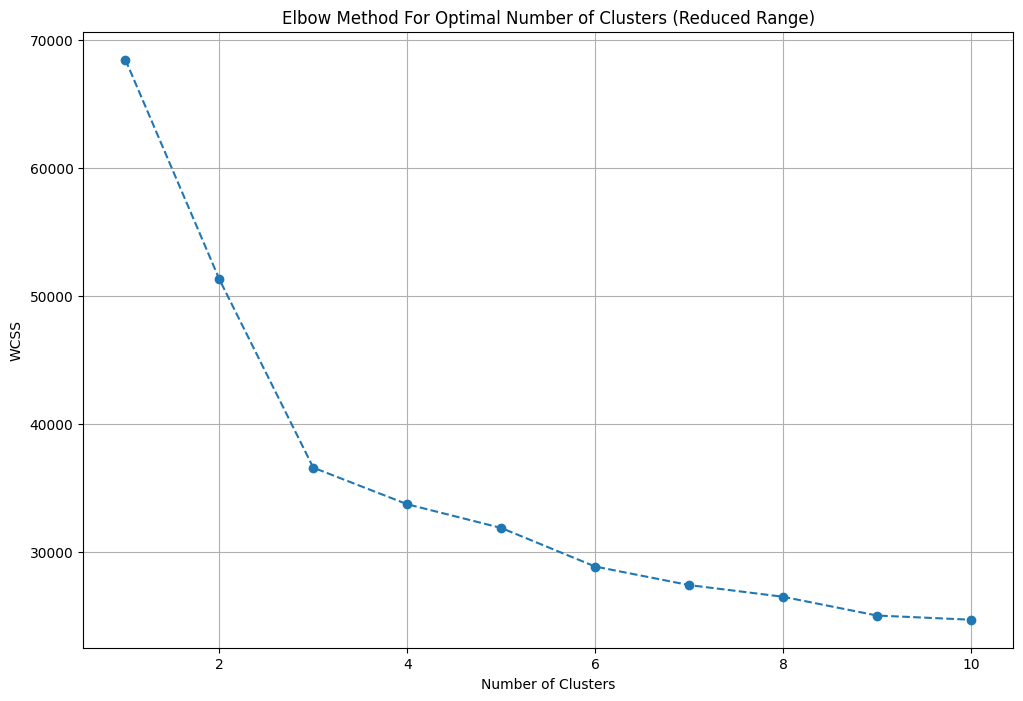

In [676]:

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [677]:

n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [678]:
df=df.iloc[:,:-18]

In [679]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,additionalroom,floornum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,4.0,West,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Dentecare - Multispeciality Dental Clinic', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Indian bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']","['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']",NaN,NaN,900.0,0,0,0,0,0
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,1.0,West,Old Property,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Sneh Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Dr. Sindhu Clinic', 'Bhardwaj Hospital', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Dr. Hitesh Dawar', 'Prateek Nursing Home And Polyclinic', 'R K Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Kr Dental Hub', 'Gurgaon Eye Centre', 'Shree Krishna Hospital Gurgaon', 'Dr. Ashok Jain', 'GH Gurgaon', 'Aryan Hospital', 'Dr. Agya Ram Sharma Clinic', 'Pearl Dental Clinic', 'D.R. Rajnis Gupta Clinic', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Geeta Nursing Home Gurgaon', 'Taneja Hospital', 'Ravi Clinic and Health Care Centre', 'Dr. Sarvejeet Singh', 'Esic Hospital Gurugram', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Jackson Hospital', 'Jeevan Jyoti Hospital Gurgaon', 'Chiranjiv Hospital', 'Dr. Tomar Clinic', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Lieutenant Atul Kataria School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '3 Light', '1 Curtains', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,650.0,0,0,0,0,0
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,595.0,Carpet area: 595 (55.28 sq.m.),2,2,3

In [680]:
df['furnishing_type'] = cluster_assignments

In [681]:
df.sample(5)[['furnishDetails','furnishing_type']]

,furnishDetails,furnishing_type
3693,"['1 Water Purifier', '4 Fan', '1 Fridge', '1 Exhaust Fan', '5 Geyser', '1 Stove', '5 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '5 Wardrobe', '1 Washing Machine', 'No Bed', 'No Dining Table', 'No Microwave', 'No Sofa', 'No TV']",2
403,"['1 Water Purifier', '1 Exhaust Fan', '5 Geyser', '1 Stove', '1 Modular Kitchen', '5 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine']",0
929,NaN,1
1255,"['7 Light', '1 Modular Kitchen', '5 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
1400,NaN,1


In [682]:
df[['society','features']].sample(5)

,society,features
521,dlf the ultima,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2901,sare crescent parc,"['Security / Fire Alarm', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
1521,orchid petals,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
3281,independent,"['Private Garden / Terrace', 'Water Storage', 'Park', 'Visitor Parking']"
3169,independent,NaN


In [683]:
df['features'].isnull().sum()

np.int64(635)

In [684]:
app_df=pd.read_csv('/content/drive/MyDrive/Property Price Prediction/appartments.csv')

In [685]:
app_df.sample(5)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
25,La Vida by Tata Housing,"2, 3 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', ""Rion's Hospital"", 'Dwarka Expy', 'Bijwasan Railway Station', 'Euro International School, Sector- 109.']","{'Bajghera Road': '550 Meter', ""Rion's Hospital"": '3.1 KM', 'Dwarka Expy': '3.8 KM', 'Bijwasan Railway Station': '4.5 KM', 'Euro International School, Sector- 109.': '6.1 KM', 'The NorthCap University': '6.7 KM', 'Dwarka Sector 21': '7.4 KM', 'Pacific D21 Mall': '7.5 KM', 'Indira Gandhi Intl Airport': '15.6 KM'}",https://www.99acres.com/la-vida-by-tata-housing-sector-113-gurgaon-npxid-r265503,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,276 - 1,573 sq.ft.', 'price-range': '₹ 1.88 - 3.43 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,579 sq.ft.', 'price-range': '₹ 1.73 - 3.44 Cr'}}","['Mini Theatre', 'Natural Pond', 'Swimming Pool', 'Card Room', 'Sauna', 'Spa', 'Squash Court', 'Cricket Pitch', 'Sun Deck']"
68,Emaar MGF Marbella,"4, 5 BHK Villa, Land in Sector 66, Gurgaon","['NH 48', 'HUB 66', 'Park Hospital', 'Gurugram University', 'Vatika Business Centre']","{'NH 48': '2.3 Km', 'HUB 66': '2.7 Km', 'Park Hospital': '3.3 Km', 'Gurugram University': '4.1 Km', 'Vatika Business Centre': '4.3 Km', 'De Adventure Park': '5.4 Km', 'Sealdah': '6 Km', 'Sector 55-56 Rapid Metro Station': '6.3 Km', 'Delhi Public School': '6.6 Km', 'Tau DeviLal Sports Complex': '7.3 Km', 'Hasanpur': '7.9 Km', 'DLF Golf and Country Club': '11.8 km', 'The Oberoi': '16 Km', 'Indira Gandhi International Airport': '24.1 Km'}",https://www.99acres.com/emaar-mgf-marbella-sector-66-gurgaon-npxid-r1134,"{'4 BHK': {'building_type': 'Villa', 'area_type': 'Built-up Area', 'area': '5,605 sq.ft.', 'price-range': '₹ 8.8 - 9 Cr'}, '5 BHK': {'building_type': 'Villa', 'area_type': 'Built-up Area', 'area': '6,520 - 8,120 sq.ft.', 'price-range': '₹ 10.47 - 13.04 Cr'}, 'Land': {'building_type': '', 'area_type': 'Plot Area', 'area': '2,400 - 5,175 sq.ft.', 'price-range': '₹ 7.48 - 20.05 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Concierge Service', 'Swimming Pool', 'Lounge', 'Bar/Chill-Out Lounge', 'Cigar Lounge', 'Changing Area', 'Salon']"
79,Central Park Flower Valley,"2, 3, 4 BHK Apartment, 4 BHK Villa, Land, 2, 3, 4 BHK Independent Floor in Sector-33 Sohna, Gurgaon","['Marigold Secondary School', 'Alpine Convent School', 'Medanta Hospital', 'Alpine Hospital', 'Pushpanjali Hospital']","{'Marigold Secondary School': '3 mins', 'Alpine Convent School': '5 mins', 'Medanta Hospital': '6 mins', 'Alpine Hospital': '6 mins', 'Pushpanjali Hospital': '8 mins', 'Golf Course Extension Rd': '10 mins', 'Country Inn': '10 mins', 'Westin': '10 mins', 'The Millenium School': '10 mins', 'Rajiv Chowk - Sohna Highway': '15 mins', 'KMP corridor': '15 mins', 'Central Park Resorts': '20 mins', 'De Adventure Park': '25 mins', 'GD Goenka University': '30 mins', 'IGI Airport': '35 mins'}",https://www.99acres.com/central-park-flower-valley-sector-33-sohna-gurgaon-npxid-r22052,"{'2 BHK': {'building_type': 'Independent Floor', 'area_type': 'Super Built-up Area', 'area': '1,093 - 1,620 sq.ft.', 'price-range': '₹ 1.09 - 1.63 Cr'}, '3 BHK': {'building_type': 'Independent Floor', 'area_type': 'Super Built-up Area', 'area': '1,230 - 1,274 sq.ft.', 'price-range': '₹ 1.15 - 1.27 Cr'}, '4 BHK': {'building_type': 'Villa', 'area_type': 'Built-up Area', 'area': '3,700 sq.ft.', 'price-range': 'Price on Request'}, 'Land': {'building_type': '', 'area_type': 'Plot Area', 'area': '1,620 - 9,000 sq.ft.', 'price-range': '₹ 1.94 - 10.8 Cr'}}","['Swimming Pool', 'Reading Lounge', 'Reflexology Park', 'Golf Course', 'Aerobics Centre', 'Sauna', 'Jacuzzi', 'Steam Room', 'Creche/Day care']"
47,DLF Alameda,"3 BHK Villa, Land, 3, 4, 5 BHK Independent Floor in Sector 73, Gurgaon","['Captain Chandan Lal Marg', 'CD International School', 'Badshahpur Sohn

In [686]:
app_df['PropertyName']=app_df['PropertyName'].str.lower()

In [687]:
temp_df=df[df['features'].isnull()]

In [688]:
temp_df.shape

(635, 26)

In [689]:
#temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')[['features','TopFacilities']]

In [690]:
x=temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [691]:
df.loc[temp_df.index,'features']=x.values

In [692]:
df['features'].isnull().sum()

np.int64(496)

In [693]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [694]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [695]:
features_binary_df.shape

(3803, 128)

In [696]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

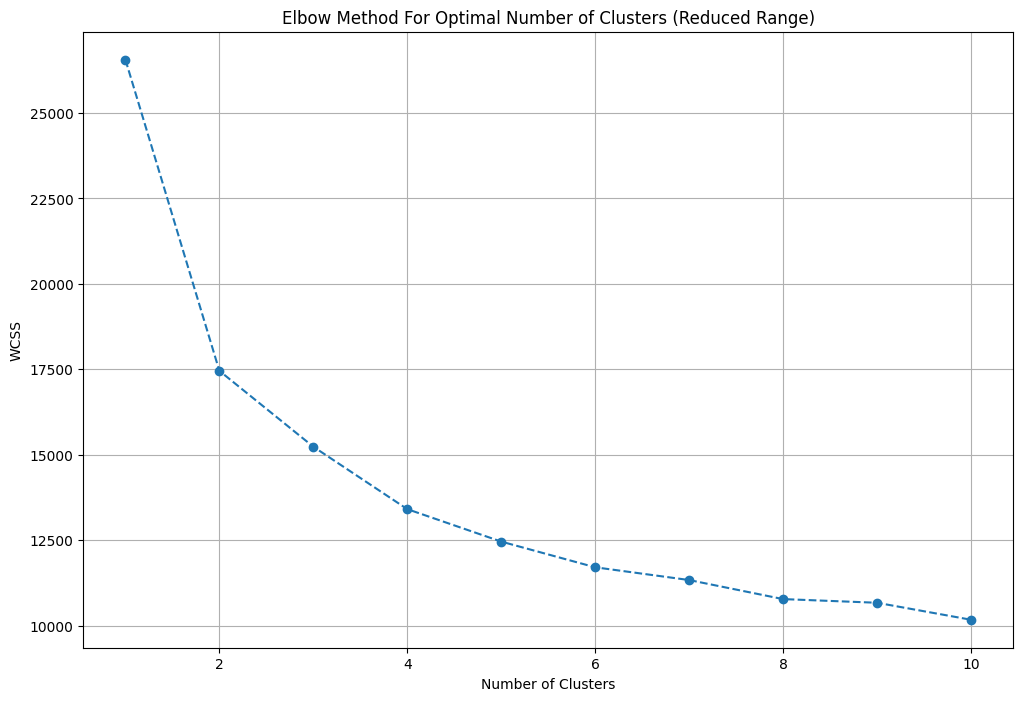

In [697]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [698]:
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}

In [699]:
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [700]:
df['luxury_score'] = luxury_score

In [701]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,additionalroom,floornum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,900.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,4.0,West,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Pearl Dental Clinic', 'Taneja Hospital', 'Dr. Ashok Jain', 'Dr. Madan Clinic', 'Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Dev Man Kathuria Clinic', 'Aryan Hospital', 'Kr Dental Hub', 'Swastik Maternity and Medical Centre', 'Satyam Hospital Gurgaon', 'Ravi Clinic and Health Care Centre', 'D.R. Rajnis Gupta Clinic', 'Esic Hospital Gurugram', 'Gurgaon Eye Centre', 'Bindal Clinic', 'Shiv Mahima Patient Care Bureau', 'Shree Krishna Hospital Gurgaon', 'M.S Hospital', 'My Care Clinic', 'Ankur Clinic and Maternity Home', 'Triveni Hospital Gurgaon', 'Shri Gobind Hospital', 'Navjeevan Hospital and Maternity Centre', 'Lal Superspeciality Hospital', 'Sparsh Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Bhatnagar Maternity and Nursing Home', 'Tirath Ram Hospitals Pvt Ltd', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Ajay S. Gupta Clinic', 'Kidney Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Sethi Hospital Gurgaon', 'Shubham Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Dentecare - Multispeciality Dental Clinic', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Indian bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']","['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Water Storage', 'Visitor Parking']",NaN,NaN,900.0,0,0,0,0,0,1,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Lift(s), Water Storage, Visitor Parking]",28
1,flat,apna enclave,sector 3,0.50,7692.0,650.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,1.0,West,Old Property,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Sneh Hospital Gurgaon', 'Jiya Clinic', 'Dr. Mittal Clinic', ""Dr. Anurag's Child Care Clinic"", 'Yashroop Medical Centre', 'Dr. Sindhu Clinic', 'Bhardwaj Hospital', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sarvodya Hospital', 'Dr. Hitesh Dawar', 'Prateek Nursing Home And Polyclinic', 'R K Hospital Gurgaon', 'Chirag Hospital Pvt. Ltd', 'Kr Dental Hub', 'Gurgaon Eye Centre', 'Shree Krishna Hospital Gurgaon', 'Dr. Ashok Jain', 'GH Gurgaon', 'Aryan Hospital', 'Dr. Agya Ram Sharma Clinic', 'Pearl Dental Clinic', 'D.R. Rajnis Gupta Clinic', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Geeta Nursing Home Gurgaon', 'Taneja Hospital', 'Ravi Clinic and Health Care Centre', 'Dr. Sarvejeet Singh', 'Esic Hospital Gurugram', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Jackson Hospital', 'Jeevan Jyoti Hospital Gurgaon', 'Chiranjiv Hospital', 'Dr. Tomar Clinic', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Lieutenant Atul Kataria School', 'Dronacharya Government College', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '3 Light', '1 Curtains', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Maintenance Staff', 'Water Storage', 'P

In [702]:
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalroom'],inplace=True)

In [703]:
df.sample()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,floornum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
181,flat,m3m antalya hills,sector 79,1.15,7496.0,1534.0,Super Built up area 1534(142.51 sq.m.)Built Up area: 1200 sq.ft. (111.48 sq.m.)Carpet area: 1103 sq.ft. (102.47 sq.m.),3,3,3+,1.0,NaN,Under Construction,1534.0,1200.0,1103.0,1,0,0,0,0,1,51


In [704]:
df.shape

(3803, 23)

In [705]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3786 non-null   float64
 4   price_per_sqft       3786 non-null   object 
 5   area                 3803 non-null   object 
 6   areaWithType         3803 non-null   object 
 7   bedroom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floornum             3786 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1187 non-null   float64
 15  carpet_area          1944 non-null   f

In [706]:
df.to_csv('project.cleaned.from.feature.engineering.csv',index=False)